In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,precision_score

In [136]:
#全部特征
dataset = pd.read_csv('train_data.csv')
#经过特征选择后的特征
dataset_part= pd.read_csv('train.csv')

In [3]:
dataset.head()

,total_loan,year_of_loan,interest,monthly_payment,employer_type,industry,work_year,house_exist,censor_status,use,...,is_default,sub_class,work_type,house_loan_status,marriage,offsprings,f5,issue_date_y,issue_date_m,issue_date_diff
0,31818.18182,3,11.466,1174.91,1,0,3.0,0,1,2,...,0,25,0.0,0.0,0.0,0.0,0.0,2016,10,3410
1,28000.00000,5,16.841,670.69,1,0,10.0,0,2,0,...,0,25,0.0,0.0,0.0,0.0,0.0,2013,6,2192
2,17272.72727,3,8.900,603.32,1,2,10.0,1,0,4,...,0,35,0.0,0.0,0.0,0.0,0.0,2014,1,2406
3,20000.00000,3,4.788,602.30,4,4,6.0,0,1,0,...,0,35,0.0,0.0,0.0,0.0,0.0,2015,7,2952
4,15272.72727,3,12.790,470.31,1,5,0.0,2,1,0,...,0,25,0.0,0.0,0.0,0.0,0.0,2016,7,3318


In [4]:
dataset_part.head()

,interest,sub_class,marriage,scoring_high,employer_type,scoring_low,work_type,offsprings,early_return_amount,year_of_loan,is_default,debt_loan_ratio,monthly_payment
0,11.466,25,0.0,649.090909,1,556.363636,0.0,0.0,9927,3,0,2.430000,1174.91
1,16.841,25,0.0,893.750000,1,715.000000,0.0,0.0,0,5,0,11.004545,670.69
2,8.900,35,0.0,903.636364,1,774.545455,0.0,0.0,0,3,0,6.409091,603.32
3,4.788,35,0.0,875.000000,4,750.000000,0.0,0.0,0,3,0,9.204545,602.30
4,12.790,25,0.0,710.606061,1,609.090909,0.0,0.0,0,3,0,15.578182,470.31


# 逻辑回归——使用全部特征

In [5]:
# 分类特征dummy处理
df_getdummy=pd.get_dummies(data=dataset, columns=['marriage','industry','house_exist','censor_status','use','house_loan_status','issue_date_y','employer_type','work_type','offsprings','year_of_loan'])
X = df_getdummy.drop('is_default',axis=1)
y = df_getdummy['is_default']

In [6]:
#30%测试集
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0) 

In [7]:
#标准化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression
#构建模型参数
LGR = LogisticRegression(penalty='l2', multi_class='multinomial',solver="newton-cg",n_jobs=12)
# 训练模型
LGR.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial', n_jobs=12, solver='newton-cg')

In [9]:
# 训练集
train_probs=LGR.predict_proba(X_train)
train_predict=LGR.predict(X_train)
#测试集
test_probs=LGR.predict_proba(X_test)
test_predict=LGR.predict(X_test)

In [12]:
#效果
print('-----------------训练集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_train,train_predict))
print('\nTest Classification report:\n',classification_report(Y_train,train_predict))
print('-----------------测试集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_test,test_predict))
print('\nTest Classification report:\n',classification_report(Y_test,test_predict))

-----------------训练集上得分：-----------------------
Test accuracy_score: 0.8710594281196468

Test Classification report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92    410451
           1       0.87      0.50      0.64    120779

    accuracy                           0.87    531230
   macro avg       0.87      0.74      0.78    531230
weighted avg       0.87      0.87      0.86    531230

-----------------测试集上得分：-----------------------
Test accuracy_score: 0.8711560592085036

Test Classification report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92    176316
           1       0.85      0.50      0.63     51354

    accuracy                           0.87    227670
   macro avg       0.86      0.74      0.77    227670
weighted avg       0.87      0.87      0.85    227670



In [13]:
# 逻辑回归_全特征
fpr,tpr,threshold=roc_curve(Y_test,LGR.predict_proba(X_test)[:,1])
auc = roc_auc_score(Y_test,LGR.predict_proba(X_test)[:,1])

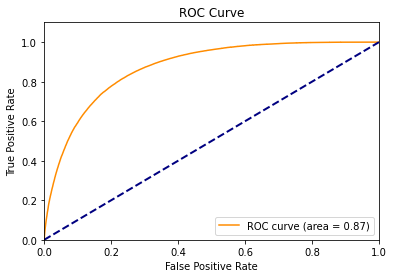

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=6,4
#画图
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 逻辑回归——使用部分特征

In [18]:
# 分类特征dummy处理
df_getdummy=pd.get_dummies(data=dataset_part, columns=['marriage','employer_type','work_type','offsprings','year_of_loan'])
X = df_getdummy.drop('is_default',axis=1)
y = df_getdummy['is_default']

In [19]:
#30%测试集
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0) 

In [20]:
#标准化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
#构建模型参数
LGR = LogisticRegression(penalty='l2', multi_class='multinomial',solver="newton-cg",n_jobs=12)
# 训练模型
LGR.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial', n_jobs=12, solver='newton-cg')

In [22]:
# 训练集
train_probs=LGR.predict_proba(X_train)
train_predict=LGR.predict(X_train)
#测试集
test_probs=LGR.predict_proba(X_test)
test_predict=LGR.predict(X_test)

In [27]:
#效果
print('-----------------训练集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_train,train_predict))
print('\nTest Classification report:\n',classification_report(Y_train,train_predict))
print('-----------------测试集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_test,test_predict))
print('\nTest Classification report:\n',classification_report(Y_test,test_predict))

-----------------训练集上得分：-----------------------
Test accuracy_score: 0.9158789977975641

Test Classification report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95    460451
           1       0.72      0.67      0.69     70779

    accuracy                           0.92    531230
   macro avg       0.83      0.82      0.82    531230
weighted avg       0.92      0.92      0.92    531230

-----------------测试集上得分：-----------------------
Test accuracy_score: 0.9061751658101638

Test Classification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95    185316
           1       0.88      0.60      0.71     42354

    accuracy                           0.91    227670
   macro avg       0.90      0.79      0.83    227670
weighted avg       0.91      0.91      0.90    227670



In [128]:
# 逻辑回归_部分特征
fpr1,tpr1,threshold1=roc_curve(Y_test,LGR.predict_proba(X_test)[:,1])
auc1 = roc_auc_score(Y_test,LGR.predict_proba(X_test)[:,1])

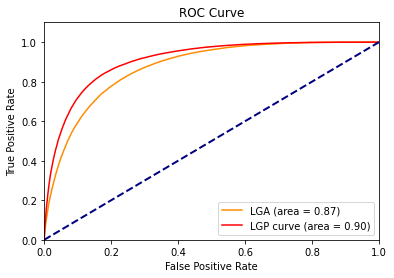

In [132]:
plt.rcParams['figure.figsize']=6,4
#画图
# 逻辑回归_全部特征
plt.plot(fpr,tpr,color='darkorange',label='LGA (area = %0.2f)' % auc)
#逻辑回归_部分特征
plt.plot(fpr1,tpr1,color='red',label='LGP curve (area = %0.2f)' % auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 朴素贝叶斯——使用部分特征

In [133]:
from sklearn.naive_bayes import GaussianNB

In [137]:
X = dataset[['marriage','industry','house_exist','censor_status','censor_status','house_loan_status','issue_date_y','employer_type','work_type','offsprings','year_of_loan']]
y = dataset['is_default']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0) 

In [139]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [140]:
# 训练集
train_probs=gnb_model.predict_proba(X_train)
train_predict=gnb_model.predict(X_train)

# 测试集
test_probs=gnb_model.predict_proba(X_test)
test_predict=gnb_model.predict(X_test)
#效果
print('-----------------训练集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_train,train_predict))
print('\nTest Classification report:\n',classification_report(Y_train,train_predict))
print('-----------------测试集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_test,test_predict))
print('\nTest Classification report:\n',classification_report(Y_test,test_predict))

-----------------训练集上得分：-----------------------
Test accuracy_score: 0.7839561018767766

Test Classification report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87    425451
           1       0.46      0.45      0.45    105779

    accuracy                           0.78    531230
   macro avg       0.66      0.66      0.66    531230
weighted avg       0.78      0.78      0.78    531230

-----------------测试集上得分：-----------------------
Test accuracy_score: 0.7843457636052181

Test Classification report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87    182316
           1       0.46      0.46      0.46     45354

    accuracy                           0.78    227670
   macro avg       0.66      0.66      0.66    227670
weighted avg       0.78      0.78      0.78    227670



In [142]:
# 朴素贝叶斯_部分特征
fpr2,tpr2,threshold2=roc_curve(Y_test,gnb_model.predict_proba(X_test)[:,1])
auc2 = roc_auc_score(Y_test,gnb_model.predict_proba(X_test)[:,1])

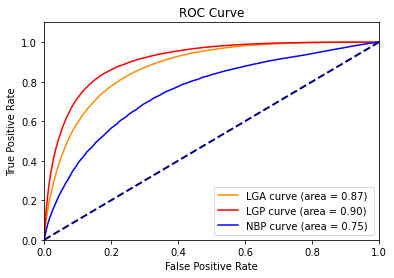

In [148]:
plt.rcParams['figure.figsize']=6,4
#画图
# 逻辑回归_全部特征
plt.plot(fpr,tpr,color='darkorange',label='LGA curve (area = %0.2f) ' % auc)
#逻辑回归_部分特征
plt.plot(fpr1,tpr1,color='red',label='LGP curve (area = %0.2f)' % auc1)
#朴素贝叶斯_部分特征
plt.plot(fpr2,tpr2,color='blue',label='NBP curve (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 朴素贝叶斯——使用全部特征

In [150]:
X = dataset.drop('is_default',axis=1)
y = dataset['is_default']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0) 

In [151]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [152]:
# 训练集
train_probs=gnb_model.predict_proba(X_train)
train_predict=gnb_model.predict(X_train)

# 测试集
test_probs=gnb_model.predict_proba(X_test)
test_predict=gnb_model.predict(X_test)
#效果
print('-----------------训练集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_train,train_predict))
print('\nTest Classification report:\n',classification_report(Y_train,train_predict))
print('-----------------测试集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_test,test_predict))
print('\nTest Classification report:\n',classification_report(Y_test,test_predict))

-----------------训练集上得分：-----------------------
Test accuracy_score: 0.3475481429889125

Test Classification report:
               precision    recall  f1-score   support

           0       0.97      0.19      0.32    425451
           1       0.23      0.98      0.37    105779

    accuracy                           0.35    531230
   macro avg       0.60      0.58      0.35    531230
weighted avg       0.82      0.35      0.33    531230

-----------------测试集上得分：-----------------------
Test accuracy_score: 0.34661571572890587

Test Classification report:
               precision    recall  f1-score   support

           0       0.97      0.19      0.32    182316
           1       0.23      0.98      0.37     45354

    accuracy                           0.35    227670
   macro avg       0.60      0.58      0.35    227670
weighted avg       0.82      0.35      0.33    227670



In [153]:
# 朴素贝叶斯_全部特征
fpr3,tpr3,threshold3=roc_curve(Y_test,gnb_model.predict_proba(X_test)[:,1])
auc3 = roc_auc_score(Y_test,gnb_model.predict_proba(X_test)[:,1])

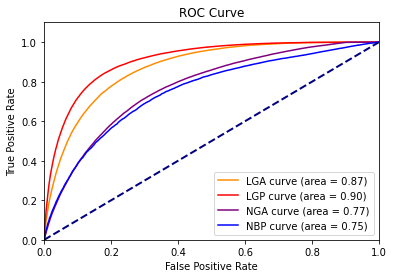

In [154]:
plt.rcParams['figure.figsize']=6,4
#画图
# 逻辑回归_全部特征
plt.plot(fpr,tpr,color='darkorange',label='LGA curve (area = %0.2f) ' % auc)
#逻辑回归_部分特征
plt.plot(fpr1,tpr1,color='red',label='LGP curve (area = %0.2f)' % auc1)
#朴素贝叶斯_全部特征
plt.plot(fpr3,tpr3,color='purple',label='NGA curve (area = %0.2f)' % auc3)
#朴素贝叶斯_部分特征
plt.plot(fpr2,tpr2,color='blue',label='NBP curve (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 随机森林——使用全部特征

In [156]:
X = dataset.drop('is_default',axis=1)
y = dataset['is_default']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0) 

In [157]:
from sklearn import datasets,svm,metrics,model_selection,preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# 实例化随机森林
rfc=RandomForestClassifier()
# 调参参数设置
rf_param_grid = {'n_estimators':[100,200,500], 'min_samples_split':[2,3,5,10], 
                 'min_samples_leaf':[4,6,10], 'max_depth':[10,50]}
rf_grid = model_selection.GridSearchCV(rfc, rf_param_grid, cv=5, n_jobs=12, verbose=1, scoring='accuracy')
# 训练模型
rf_grid.fit(X_train, Y_train)
train_probs=rf_grid.predict_proba(X_train)
train_predict=rf_grid.predict(X_train)
test_probs=rf_grid.predict_proba(X_test)
test_predict=rf_grid.predict(X_test)

In [203]:
#效果
print('-----------------训练集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_train,train_predict))
print('\nTest Classification report:\n',classification_report(Y_train,train_predict))
print('-----------------测试集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_test,test_predict))
print('\nTest Classification report:\n',classification_report(Y_test,test_predict))

-----------------训练集上得分：-----------------------
Test accuracy_score: 0.8904214746908119

Test Classification report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93    415451
           1       0.90      0.55      0.68    115779

    accuracy                           0.89    531230
   macro avg       0.90      0.77      0.81    531230
weighted avg       0.89      0.89      0.88    531230

-----------------测试集上得分：-----------------------
Test accuracy_score: 0.9031590459876137

Test Classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94    193079
           1       0.70      0.64      0.67     34591

    accuracy                           0.90    227670
   macro avg       0.82      0.80      0.81    227670
weighted avg       0.90      0.90      0.90    227670



In [180]:
# 随机森林_全部特征
fpr4,tpr4,threshold4=roc_curve(Y_test,rf_grid.predict_proba(X_test)[:,1])
auc4 = roc_auc_score(Y_test,rf_grid.predict_proba(X_test)[:,1])

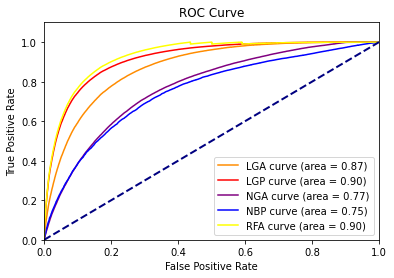

In [197]:
plt.rcParams['figure.figsize']=6,4
#画图
# 逻辑回归_全部特征
plt.plot(fpr,tpr,color='darkorange',label='LGA curve (area = %0.2f) ' % auc)
#逻辑回归_部分特征
plt.plot(fpr1,tpr1,color='red',label='LGP curve (area = %0.2f)' % auc1)
#朴素贝叶斯_全部特征
plt.plot(fpr3,tpr3,color='purple',label='NGA curve (area = %0.2f)' % auc3)
#朴素贝叶斯_部分特征
plt.plot(fpr2,tpr2,color='blue',label='NBP curve (area = %0.2f)' % auc2)
#随机森林_全部特征
plt.plot(fpr4,tpr4,color='yellow',label='RFA curve (area = %0.2f)' % auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 随机森林——使用部分特征

In [198]:
X = dataset_part.drop('is_default',axis=1)
y = dataset_part['is_default']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0) 

In [199]:
from sklearn import datasets,svm,metrics,model_selection,preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# 实例化随机森林
rfc=RandomForestClassifier()
# 调参参数设置
rf_param_grid = {'n_estimators':[100,200,500], 'min_samples_split':[2,3,5,10], 
                 'min_samples_leaf':[4,6,10], 'max_depth':[10,50]}
rf_grid = model_selection.GridSearchCV(rfc, rf_param_grid, cv=5, n_jobs=12, verbose=1, scoring='accuracy')
# 训练模型
rf_grid.fit(X_train, Y_train)
train_probs=rf_grid.predict_proba(X_train)
train_predict=rf_grid.predict(X_train)
test_probs=rf_grid.predict_proba(X_test)
test_predict=rf_grid.predict(X_test)

In [206]:
#效果
print('-----------------训练集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_train,train_predict))
print('\nTest Classification report:\n',classification_report(Y_train,train_predict))
print('-----------------测试集上得分：-----------------------')
print('Test accuracy_score:',accuracy_score(Y_test,test_predict))
print('\nTest Classification report:\n',classification_report(Y_test,test_predict))

-----------------训练集上得分：-----------------------
Test accuracy_score: 0.9215644686909214

Test Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    402730
           1       0.89      0.77      0.82    128500

    accuracy                           0.92    531230
   macro avg       0.91      0.87      0.89    531230
weighted avg       0.92      0.92      0.92    531230

-----------------测试集上得分：-----------------------
Test accuracy_score: 0.9253791252450197

Test Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    172103
           1       0.93      0.73      0.82     55567

    accuracy                           0.92    227670
   macro avg       0.93      0.85      0.88    227670
weighted avg       0.92      0.92      0.92    227670



In [207]:
# 随机森林_部分特征
fpr5,tpr5,threshold5=roc_curve(Y_test,rf_grid.predict_proba(X_test)[:,1])
auc5 = roc_auc_score(Y_test,rf_grid.predict_proba(X_test)[:,1])

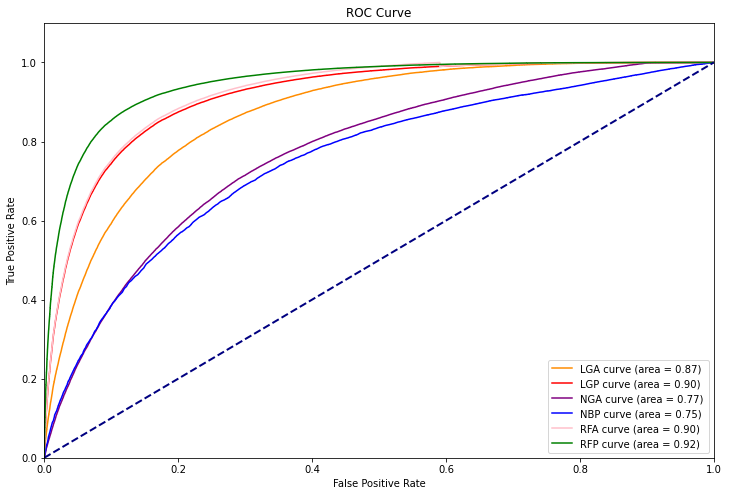

In [222]:
plt.rcParams['figure.figsize']=12,8
#画图
# 逻辑回归_全部特征
plt.plot(fpr,tpr,color='darkorange',label='LGA curve (area = %0.2f) ' % auc)
#逻辑回归_部分特征
plt.plot(fpr1,tpr1,color='red',label='LGP curve (area = %0.2f)' % auc1)
#朴素贝叶斯_全部特征
plt.plot(fpr3,tpr3,color='purple',label='NGA curve (area = %0.2f)' % auc3)
#朴素贝叶斯_部分特征
plt.plot(fpr2,tpr2,color='blue',label='NBP curve (area = %0.2f)' % auc2)
#随机森林_全部特征
plt.plot(fpr4,tpr4,color='pink',label='RFA curve (area = %0.2f)' % auc4)
#随机森林_部分特征
plt.plot(fpr5,tpr5,color='green',label='RFP curve (area = %0.2f)' % auc5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 综上所述，随机森林>逻辑斯蒂>朴素贝叶斯，并且特征选择后拟合效果更优